## EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("credit.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
checking_balance        1000 non-null object
months_loan_duration    1000 non-null int64
credit_history          1000 non-null object
purpose                 1000 non-null object
amount                  1000 non-null int64
savings_balance         1000 non-null object
employment_duration     1000 non-null object
percent_of_income       1000 non-null int64
years_at_residence      1000 non-null int64
age                     1000 non-null int64
other_credit            1000 non-null object
housing                 1000 non-null object
existing_loans_count    1000 non-null int64
job                     1000 non-null object
dependents              1000 non-null int64
phone                   1000 non-null object
default                 1000 non-null object
dtypes: int64(7), object(10)
memory usage: 132.9+ KB


In [4]:
data.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


In [5]:
list(data.columns)

['checking_balance',
 'months_loan_duration',
 'credit_history',
 'purpose',
 'amount',
 'savings_balance',
 'employment_duration',
 'percent_of_income',
 'years_at_residence',
 'age',
 'other_credit',
 'housing',
 'existing_loans_count',
 'job',
 'dependents',
 'phone',
 'default']

In [6]:
data.describe()

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [7]:
data.describe(include=['O'])

,checking_balance,credit_history,purpose,savings_balance,employment_duration,other_credit,housing,job,phone,default
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,4,5,6,5,5,3,3,4,2,2
top,unknown,good,furniture/appliances,< 100 DM,1 - 4 years,none,own,skilled,no,no
freq,394,530,473,603,339,814,713,630,596,700


In [8]:
data.isnull().sum()

checking_balance        0
months_loan_duration    0
credit_history          0
purpose                 0
amount                  0
savings_balance         0
employment_duration     0
percent_of_income       0
years_at_residence      0
age                     0
other_credit            0
housing                 0
existing_loans_count    0
job                     0
dependents              0
phone                   0
default                 0
dtype: int64

### correlation matrix

In [9]:
data.corr()

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents
months_loan_duration,1.000000,0.624984,0.074749,0.034067,-0.036136,-0.011284,-0.023834
amount,0.624984,1.000000,-0.271316,0.028926,0.032716,0.020795,0.017142
percent_of_income,0.074749,-0.271316,1.000000,0.049302,0.058266,0.021669,-0.071207
years_at_residence,0.034067,0.028926,0.049302,1.000000,0.266419,0.089625,0.042643
age,-0.036136,0.032716,0.058266,0.266419,1.000000,0.149254,0.118201
existing_loans_count,-0.011284,0.020795,0.021669,0.089625,0.149254,1.000000,0.109667
dependents,-0.023834,0.017142,-0.071207,0.042643,0.118201,0.109667,1.000000


### heat map for correlation matrix

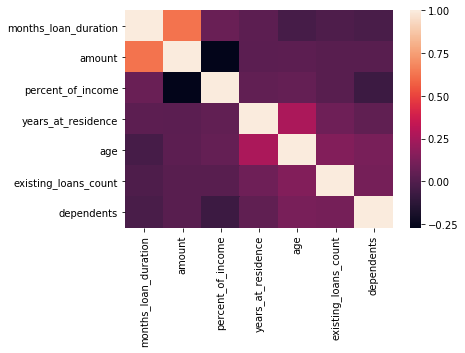

In [10]:
import seaborn as sns
sns.heatmap(data.corr())

### unique values of categorical columns in dataset

In [11]:
cols = data.columns
num_cols = data._get_numeric_data().columns
cat_cols=list(set(cols) - set(num_cols))
cat_cols

['purpose',
 'phone',
 'other_credit',
 'employment_duration',
 'housing',
 'default',
 'credit_history',
 'checking_balance',
 'job',
 'savings_balance']

In [12]:
for i in cat_cols:
    print( i, ":"  ,data[i].unique())
    

purpose : ['furniture/appliances' 'education' 'car' 'business' 'renovations' 'car0']
phone : ['yes' 'no']
other_credit : ['none' 'bank' 'store']
employment_duration : ['> 7 years' '1 - 4 years' '4 - 7 years' 'unemployed' '< 1 year']
housing : ['own' 'other' 'rent']
default : ['no' 'yes']
credit_history : ['critical' 'good' 'poor' 'perfect' 'very good']
checking_balance : ['< 0 DM' '1 - 200 DM' 'unknown' '> 200 DM']
job : ['skilled' 'unskilled' 'management' 'unemployed']
savings_balance : ['unknown' '< 100 DM' '500 - 1000 DM' '> 1000 DM' '100 - 500 DM']


### encoding categories with numbers ,just for visualization purpose

In [13]:
df = data.copy()

In [14]:
df["checking_balance"]=df["checking_balance"].map({'< 0 DM':1, '1 - 200 DM':2, 'unknown':3, '> 200 DM':4})

df["employment_duration"] = df["employment_duration"].map({'> 7 years':1, '1 - 4 years':2, '4 - 7 years':3 ,'unemployed':4, '< 1 year':5})

df["savings_balance"] = df["savings_balance"].map({'unknown':1, '< 100 DM':2, '500 - 1000 DM':3, '> 1000 DM':4, '100 - 500 DM':5})

df["phone"] = df["phone"].map({'yes':1, 'no':2})

df["purpose"] = df["purpose"].map({'furniture/appliances':1, 'education':2, 'car':3, 'business':4, 'renovations':5 ,'car0':3})

df["other_credit"] = df["other_credit"].map({'none':1, 'bank':2, 'store':3})

df["credit_history"] = df["credit_history"].map({'critical':1, 'good':2, 'poor':3, 'perfect':4, 'very good':5})

df["default"] = df["default"].map({'no':1, 'yes':2})

df["job"] = df["job"].map({'skilled':1, 'unskilled':2, 'management':3, 'unemployed':4})

df["housing"] = df["housing"].map({'own':1, 'other':2, 'rent':3})

### Amount VS Age

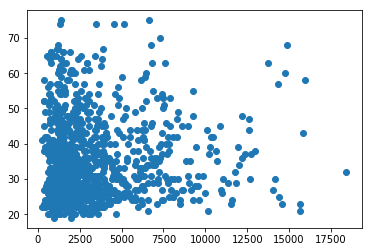

In [15]:
plt.scatter(df['amount'],df["age"])

#### Observation: Most number of people are in age between 20 to 50 and aking amount for below 7500

### pairplot of dataframe

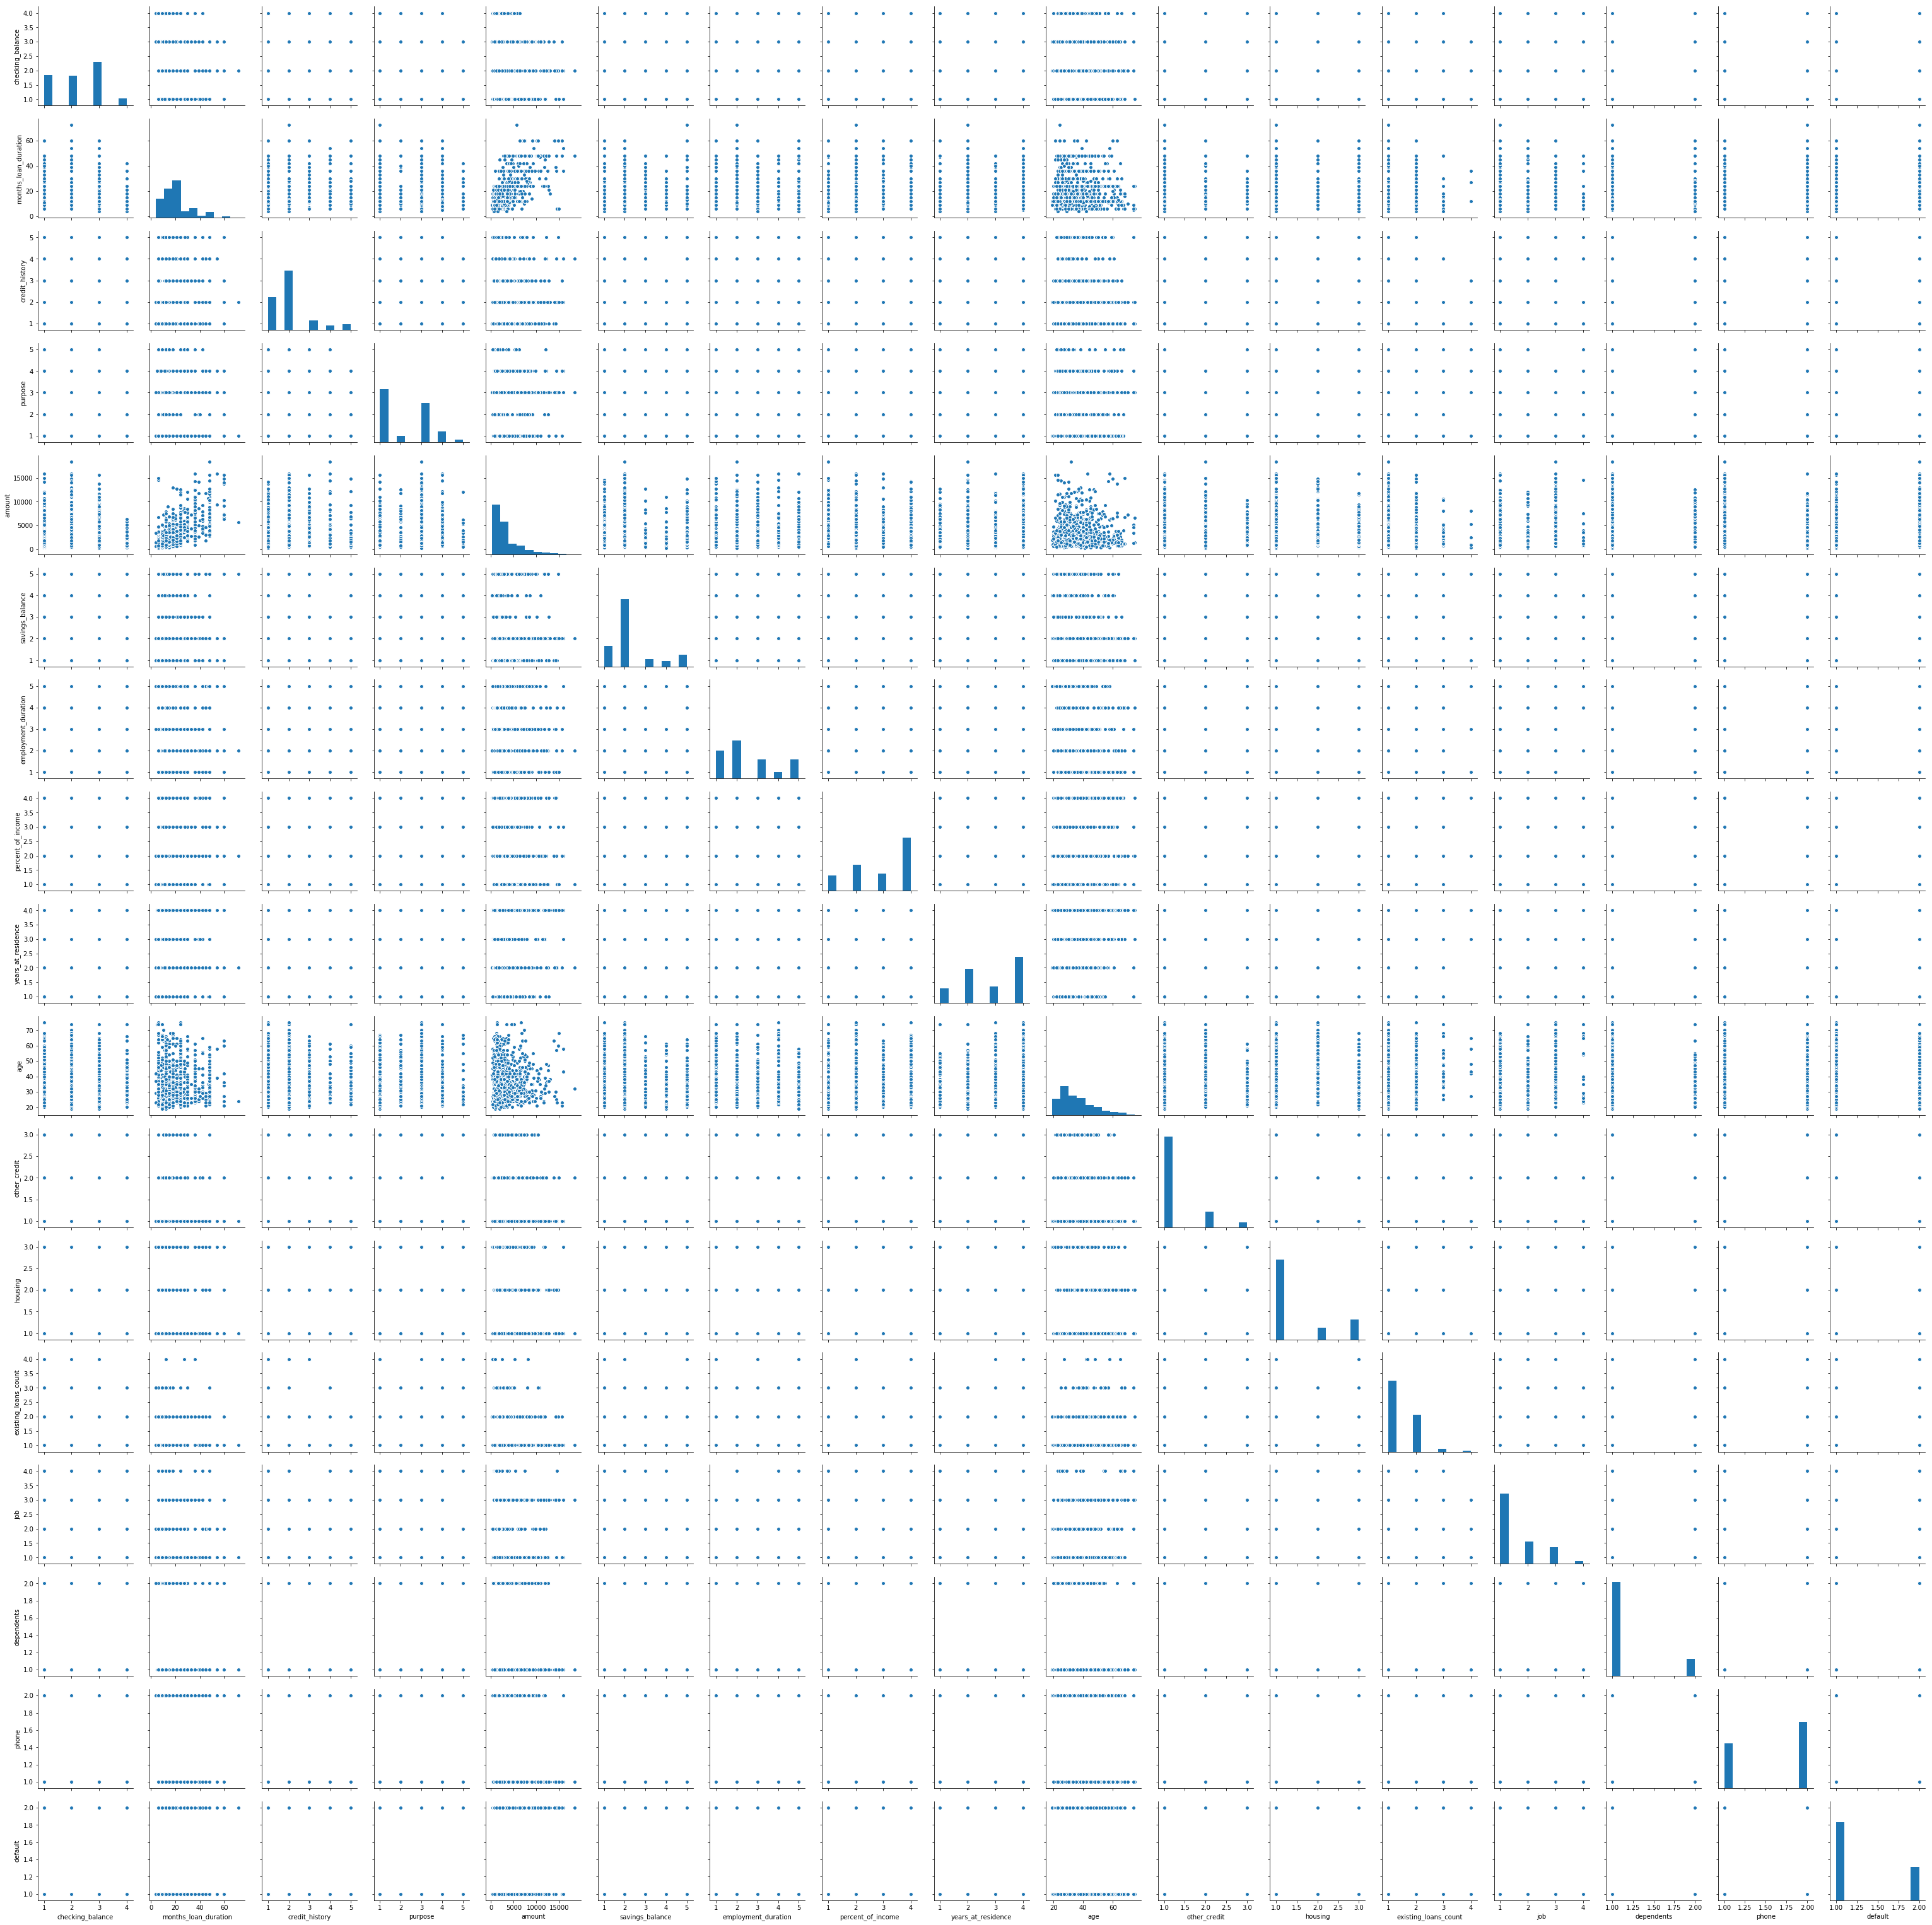

In [16]:
sns.pairplot(df)

### amount vs monthly _loan_duration

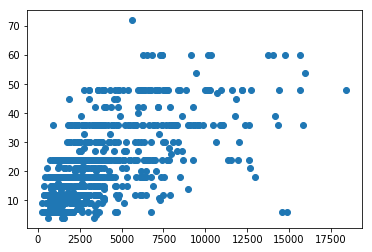

In [18]:
plt.scatter(df['amount'],df["months_loan_duration"])

#### Observation:most of monthly duration is 0-30 months and amount below 10K

### saving_balance vs months_loan_duration

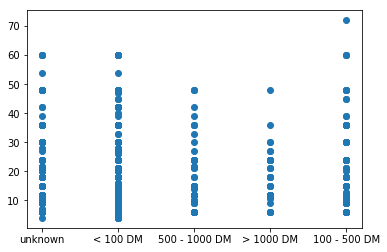

In [19]:
plt.scatter(data['savings_balance'],data["months_loan_duration"])

#### Obervation:most of the users having saving balance below 1000DM and the persons who has high monthly duration is person who has saving balance of 100-500DM

/home/skull/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


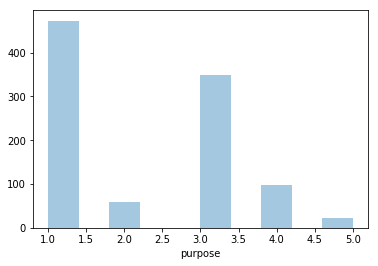

In [20]:
sns.distplot(df["purpose"],kde=False)


#### Obervation:this is endoing order of purpose column furniture/appliances':1, 'education':2, 'car':3, 'business':4, 'renovations':5 ,'car0':3 . most the people applied loan for furniture/appliances .second most reason is for car.only few people applied for renovation


Text(0,40,'Frequency')

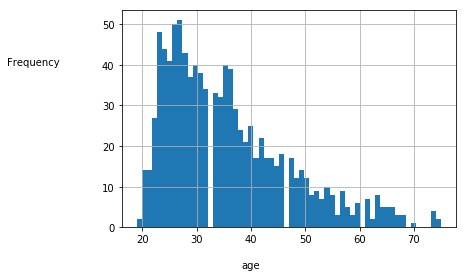

In [29]:
fig = data.age.hist(bins=60)
fig.text(40, -10, 'age', ha='center')
fig.text(0, 40, 'Frequency', ha='center')

#### observation:most of the people in age between 20 to 40

/home/skull/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


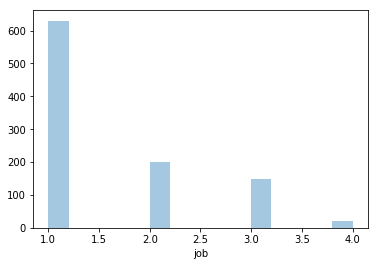

In [31]:
sns.distplot(df["job"],kde=False)

#### observation:this is the encoding order of job feature 'skilled':1, 'unskilled':2, 'management':3, 'unemployed':4. most the peoples job is skilled jobs

/home/skull/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'Frequency')

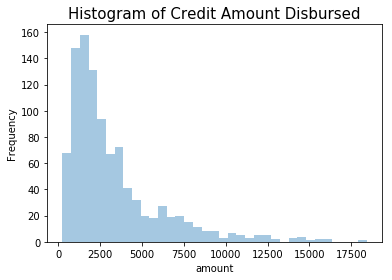

In [42]:
sns.distplot(df.amount, kde = False )
plt.title( "Histogram of Credit Amount Disbursed", fontsize = 15)
plt.ylabel( "Frequency")

#### Observation:Note: Most of the credit amounts are less than 5000 with some higher credit amounts. The largest amount disbursed is as high as 18000+

Text(0.5,1,'Boxplot of Credit Amount Disbursed')

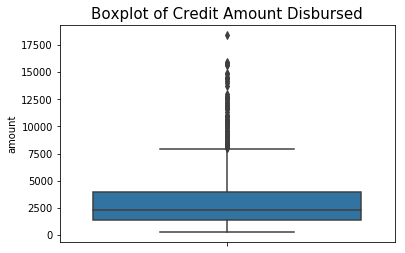

In [44]:
sns.boxplot(df.amount, orient = 'v' )
plt.title( "Boxplot of Credit Amount Disbursed", fontsize = 15)

#### observation: The middle 50% of the population lies between 1300 to 3900

In [45]:
df.columns

Index(['checking_balance', 'months_loan_duration', 'credit_history', 'purpose',
       'amount', 'savings_balance', 'employment_duration', 'percent_of_income',
       'years_at_residence', 'age', 'other_credit', 'housing',
       'existing_loans_count', 'job', 'dependents', 'phone', 'default'],
      dtype='object')

Text(0.5,1,'Boxplot of Credit Amount Disbursed by Credit Status')

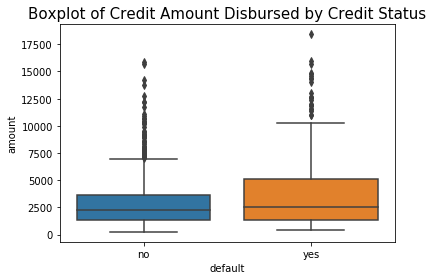

In [51]:
sns.boxplot(x  = 'default', y  = 'amount', data  =  data, orient = 'v' )
plt.title( "Boxplot of Credit Amount Disbursed by Credit Status", fontsize = 15)

#### observations:Lot of higher credit amounts seem to have been defaulted.

Text(0,0.5,'Frequency')

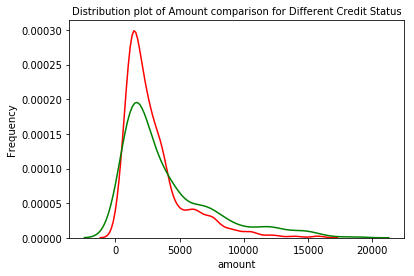

In [56]:
sns.distplot( df[df.default == 1].amount, color = 'r', hist = False )
sns.distplot( df[df.default == 2].amount, color = 'g', hist = False )
plt.title( "Distribution plot of Amount comparison for Different Credit Status", fontsize = 10 )
plt.ylabel( "Frequency")

/home/skull/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/skull/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


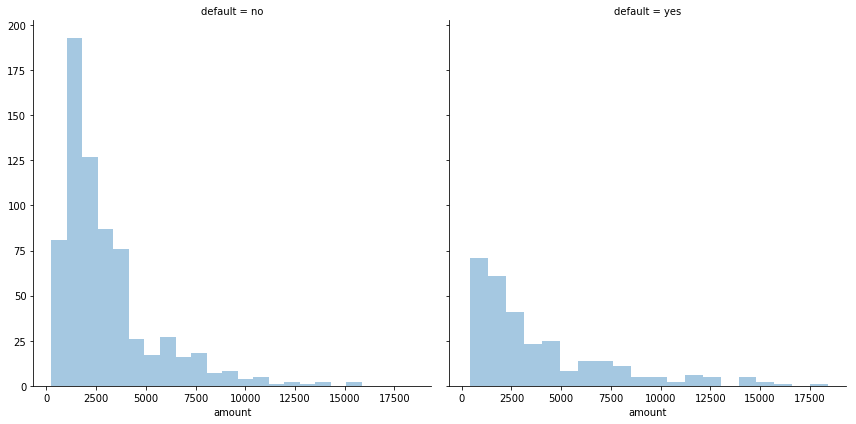

In [69]:
g  =  sns.FacetGrid(data, col="default", size = 6)
g.map(sns.distplot, "amount", kde = False, bins = 20 )

#### observation:Amounts higher than 10000 have been mostly defaulted

### credit default rate

In [71]:
d_rate_df = pd.DataFrame( data.default.value_counts( normalize=True ) )
d_rate_df

,default
no,0.7
yes,0.3


/home/skull/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/skull/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/skull/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/skull/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/skull/anaconda3/lib/python3.6/site

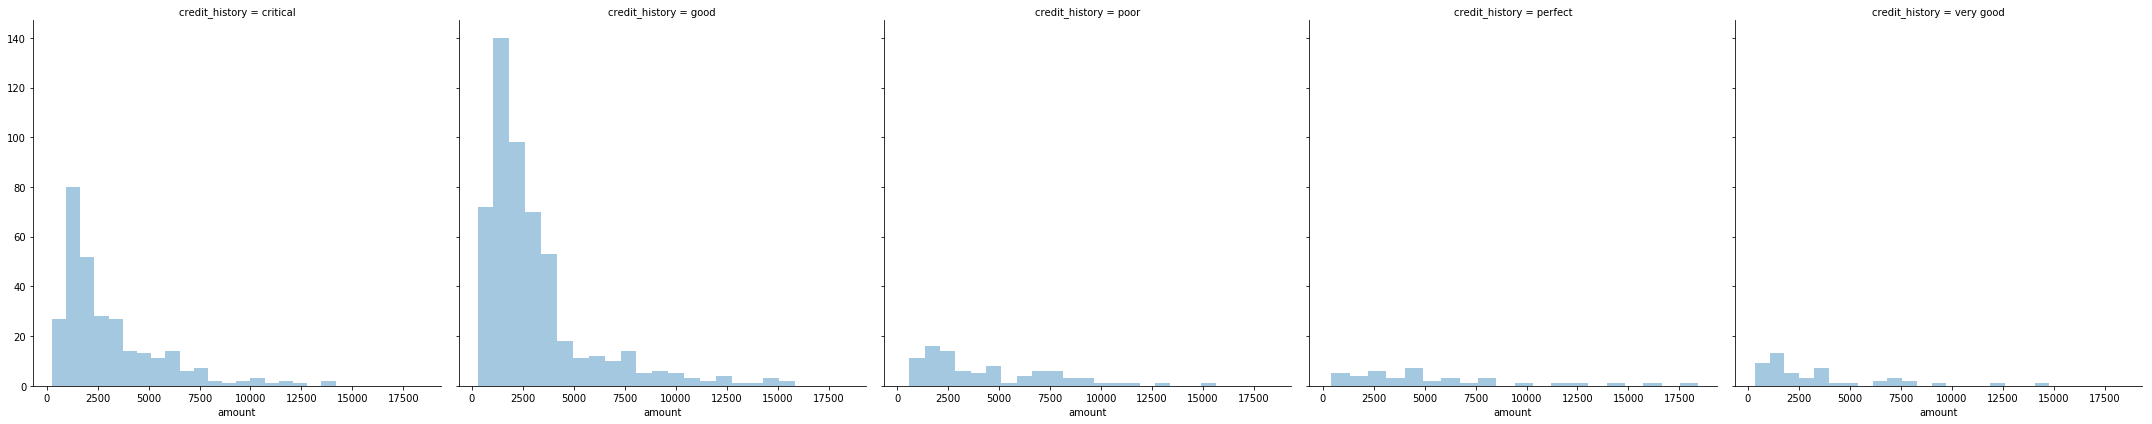

In [74]:
g  =  sns.FacetGrid(data, col="credit_history", size = 6)
g.map(sns.distplot, "amount", kde = False, bins = 20 )

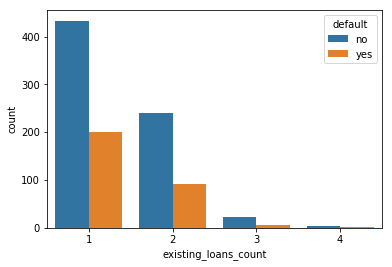

In [80]:
sns.countplot(x="existing_loans_count",hue="default" ,data=data)

#### observation: accepted loans to lesser people than who have already loans

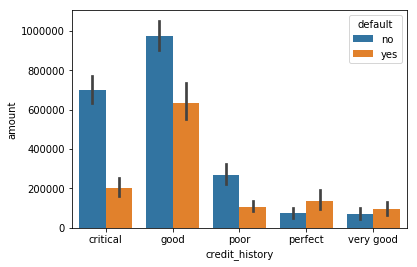

In [82]:
sns.barplot( x = 'credit_history', y = 'amount', hue = 'default', data = data, estimator = sum )


#### Observation: default is yes to more to people who has perfect and very good in credit_history

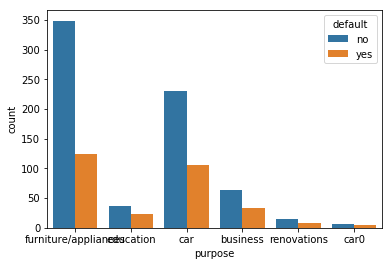

In [84]:
sns.countplot(x="purpose",hue="default",data=data)

### months_loan_duration vs amount

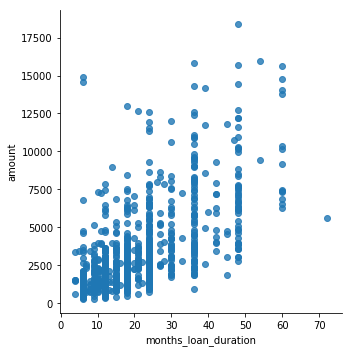

In [85]:
sns.lmplot( x = 'months_loan_duration', y = 'amount', fit_reg = False, data = data )

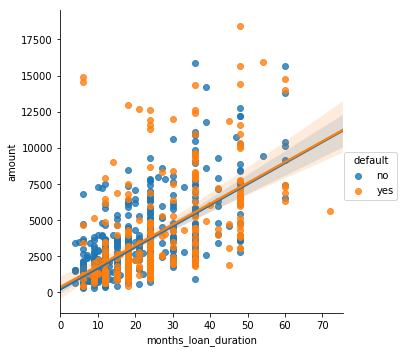

In [87]:
sns.lmplot( x = 'months_loan_duration', y = 'amount', hue = 'default', data = data )

### relationship between age vs amount seperated default

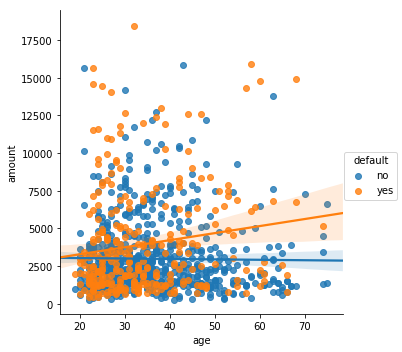

In [89]:
sns.lmplot( x = 'age', y = 'amount', hue = 'default', fit_reg = True, data = data )

### relation between dependents vs default

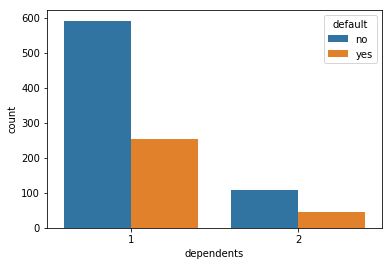

In [95]:
sns.countplot( x = 'dependents', hue = 'default', data = data)

In [97]:
pd.crosstab( data.dependents, data.default )

default,no,yes
dependents,,
1,591,254
2,109,46


## applying PCA for visualize total dataset

In [98]:
from sklearn.cluster import KMeans;
from sklearn.decomposition import PCA; 
from sklearn.preprocessing import normalize;
y = df.default
X_norm = normalize(df.drop("default",axis=1));
y_PCA = PCA(n_components=2).fit_transform(X_norm,2);
y_PCA.shape

(1000, 2)

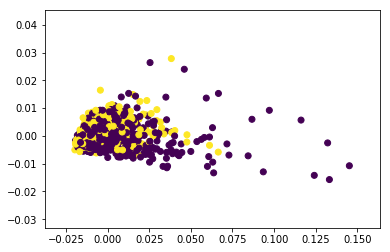

In [99]:
plt.scatter(y_PCA[:,0],y_PCA[:,1],c=y)

#### observation:Data distibution of whole dataset over default column